# PART- 3 `( Handling With Outliers )`

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
from scipy import stats
from tqdm import tqdm


tqdm.pandas()

In [164]:
# pd.options.mode.dtype_backend = 'pyarrow'
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
sns.set_style("whitegrid")

In [165]:
pd.__version__

'2.0.0rc1'

In [166]:
df = pd.read_csv('filled.csv', engine='pyarrow')
# df = pd.read_csv('filled.csv')

In [167]:
df.shape

(26302, 35)

In [168]:
df.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
model,A 160,EQE 350,A 45 AMG
price,16950.00,80900.00,69900.00
body_type,Compact,Compact,Compact
type,Used,Pre-registered,Used
doors,5.00,4.00,5.00
warranty,Yes,Yes,Yes
mileage,120200.00,5000.00,18900.00
gearbox,Manual,Automatic,Automatic


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26302 entries, 0 to 26301
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               26302 non-null  object 
 1   make                     26302 non-null  object 
 2   model                    26302 non-null  object 
 3   price                    26302 non-null  float64
 4   body_type                26302 non-null  object 
 5   type                     26302 non-null  object 
 6   doors                    26302 non-null  float64
 7   warranty                 26302 non-null  object 
 8   mileage                  26302 non-null  float64
 9   gearbox                  26302 non-null  object 
 10  seller                   26302 non-null  object 
 11  seats                    26302 non-null  float64
 12  engine_size              26302 non-null  float64
 13  gears                    26302 non-null  float64
 14  co2_emissions         

In [170]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'



def check_column_types(data):
    mixed_type_columns = [(x,', '.join(list(df[x].apply(type).unique().astype(str)))) for x in df if df[x].apply(type).nunique() > 1]
    one_type_columns = [(x,list(df[x].apply(type).unique())) for x in df if df[x].apply(type).nunique() == 1]
    for x in data:
        if data[x].apply(type).nunique() > 1:
            print("Column" + " " + color.BOLD + color.RED + str(x) + color.END + " " + "has mixed object types." )
        #elif data[x].apply(type).nunique() == 1:
            #print("Column" + " " + color.BOLD + color.GREEN + str(x) + color.END + " " + "has one object type." )
        #else:
            #print('Error')
    if(len(mixed_type_columns) == 0):
        print(color.BOLD + color.GREEN + " " + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_column_types(df)

 NO PROBLEM  with the data types of Columns in the DataFrame.


In [171]:
# no nans in dataset
df.isna().sum().sum()

0

In [172]:
def show_hist_box(feature, bins = 20, whis = 3):
    plt.figure(figsize=(20, 6))

    plt.subplot(1,2,1)
    plt.hist(feature, bins= bins)

    plt.subplot(1,2,2)
    plt.boxplot(feature, whis=whis)

    plt.show()

In [173]:
def head(feature):
    return feature.sort_values().head(20)

def tail(feature):
    return feature.sort_values().tail(20)

In [174]:
def headdf(feature):
    return df.iloc[head(feature).index]

def taildf(feature):
    return df.iloc[tail(feature).index]


In [175]:
def remove_duplicates():
    print(df.shape)
    df_copy = df.copy()
    df_copy.drop_duplicates(inplace = True)
    df_copy.reset_index(drop=True, inplace=True)
    print(df_copy.shape)
    return df_copy

In [176]:
def first_looking(col):
    print("COLUMN NAME    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [177]:
# ['make_model', 'body_type','age','fuel']
def fill_with_mode(col, groups=[]):
    df_copy = df.copy()
    print(df_copy[col].isna().value_counts()) 
    for x in range(len(groups) ,0,-1):
        print(groups[:x])
        df_copy[col] = df_copy.groupby(groups[:x])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
        print(df_copy[col].isna().value_counts())
        print('--' * 20)
    return df_copy

In [178]:
def fill_with_median(col, groups=[]):
    df_copy = df.copy()
    print(df_copy[col].isna().value_counts()) 
    for x in range(len(groups) ,0,-1):
        print(groups[:x])
        df_copy[col] = df_copy.groupby(groups[:x])[col].transform(lambda x: x.fillna(x.median()))
        print(df_copy[col].isna().value_counts()) 
        print('--' * 20)
    return df_copy

In [179]:
def drop_col(feature):
    print(df.shape)
    df.drop(feature, axis=1, inplace=True)
    print(df.shape)

In [180]:
def freq_bar(feature):
    counts = feature.value_counts(dropna=False)
    ax = counts.plot.bar()

    plt.bar_label(ax.containers[0], labels=counts.values, label_type='edge', fontsize=14)

    plt.ylabel('Frequency');

# price (target feature)

In [181]:
df.price.describe()

count     26302.00
mean      23242.71
std       25486.24
min         490.00
25%       11980.00
50%       17900.00
75%       27790.00
max     1346900.00
Name: price, dtype: float64

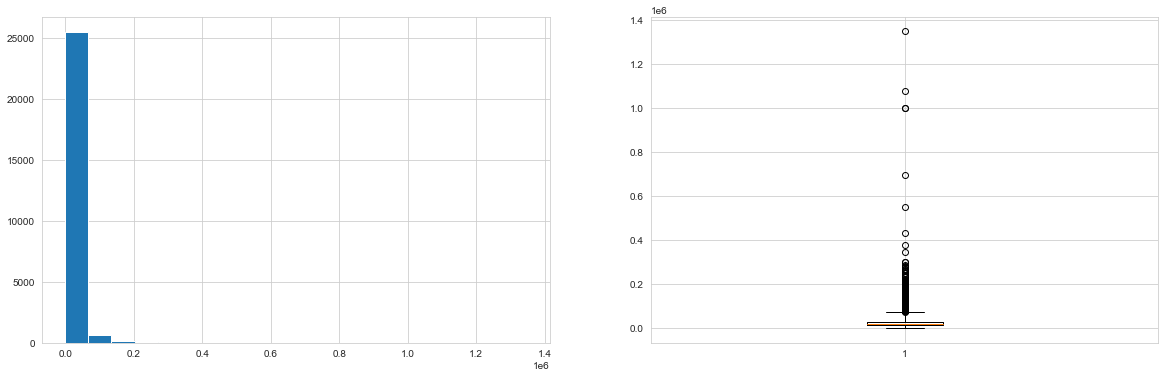

In [182]:
show_hist_box(df.price)

In [183]:
head(df.price)

5645    490.00
5317    500.00
19002   500.00
17006   590.00
5157    600.00
5103    600.00
5108    699.00
23144   700.00
3205    700.00
5323    740.00
5091    750.00
7581    750.00
19546   750.00
23879   750.00
7604    790.00
2441    790.00
5432    790.00
6250    790.00
2980    799.00
3285    800.00
Name: price, dtype: float64

In [184]:
tail(df.price)

1548     259000.00
1360     259880.00
18759    264900.00
1376     267810.00
1283     268900.00
1083     279000.00
1406     279063.00
689      283900.00
1556     284780.00
1046     299000.00
1413     299000.00
1268     344900.00
1280     375900.00
20992    430000.00
20939    549000.00
1180     696900.00
21301    998000.00
25858    999999.00
21163   1075900.00
21178   1346900.00
Name: price, dtype: float64

In [185]:
df = df.reindex(columns=['make_model', 'make', 'model', 'price', 'body_type', 'age', 'fuel', 'country', 'type', 'doors',
       'warranty', 'mileage', 'gearbox', 'seller', 'seats', 'engine_size',
       'gears', 'co2_emissions', 'drivetrain', 'cylinders', 'extras',
       'empty_weight', 'full_service_history', 'upholstery', 'previous_owner',
       'energy_efficiency_class', 'power_hp', 'power_kw',
       'fuel_consumption_avg', 'address', 'latitude',
       'longitude', 'cc', 'ss', 'em'])

In [186]:
taildf(df.price)

,make_model,make,model,price,body_type,age,fuel,country,type,doors,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,fuel_consumption_avg,address,latitude,longitude,cc,ss,em
1548,Mercedes-Benz G 63 AMG,Mercedes-Benz,G 63 AMG,259000.00,Off-Road/Pick-up,0.00,Benzine,Germany,Used,5.00,Yes,4003.00,Automatic,Dealer,5.00,3982.00,9.00,299.00,4WD,8.00,"Alloy wheels, Ambient lighting, Spare tyre",2560.00,No,Part/Full Leather,1,inefficient,585.00,430.00,14.40,"Meckenheimer Straße 12, 53359 Rheinbach, Germany",50.62,6.96,premium,Safety Security Premium Plus,Entertainment Media Premium
1360,Mercedes-Benz G 63 AMG,Mercedes-Benz,G 63 AMG,259880.00,Off-Road/Pick-up,0.00,Benzine,Germany,Demonstration,5.00,Yes,9900.00,Automatic,Dealer,5.00,3982.00,9.00,330.00,4WD,8.00,"Alloy wheels, Ambient lighting, Cargo barrier,...",2560.00,Yes,Part/Full Leather,1,inefficient,585.00,430.00,16.00,"Pankofen Irlwiesen 3, 94447 Plattling, Germany",48.80,12.91,premium_plus,Safety Security Premium Plus,Entertainment Media Premium
18759,Nissan Skyline,Nissan,Skyline,264900.00,Coupe,22.00,Benzine,Spain,Used,2.00,No,45000.00,Manual,Dealer,4.00,2500.00,5.00,257.00,4WD,6.00,Sport seats,1770.00,No,Part/Full Leather,1,efficient,426.00,313.00,12.00,"Carretera de Rubí 88, 08173 Sant Cugat del Val...",41.48,2.06,standard,Safety Security Standard,Entertainment Media Standard
1376,Mercedes-Benz G 63 AMG,Mercedes-Benz,G 63 AMG,267810.00,Off-Road/Pick-up,0.00,Benzine,Germany,Demonstration,5.00,Yes,3003.00,Automatic,Dealer,5.00,3982.00,9.00,330.00,4WD,8.00,"Alloy wheels, Ambient lighting, Cargo barrier,...",2560.00,Yes,Part/Full Leather,1,inefficient,585.00,430.00,14.40,"Hallesche Straße 150, 99734 Nordhausen, Germany",51.49,10.82,premium_plus,Safety Security Premium Plus,Entertainment Media Premium
1283,Mercedes-Benz G 63 AMG,Mercedes-Benz,G 63 AMG,268900.00,Off-Road/Pick-up,0.00,Benzine,Spain,Pre-registered,5.00,Yes,1800.00,Automatic,Dealer,5.00,3982.00,9.00,330.00,4WD,8.00,"Alloy wheels, Trailer hitch",2560.00,No,Part/Full Leather,1,inefficient,585.00,430.00,13.80,"Cardedeu, Catalonia, Spain",41.64,2.35,premium,Safety Security Standard,Entertainment Media Premium
1083,Mercedes-Benz SLS,Mercedes-Benz,SLS,279000.00,Coupe,12.00,Benzine,Germany,Used,2.00,No,30000.00,Automatic,Dealer,2.00,6208.00,9.00,308.00,4WD,4.00,"Alloy wheels, Automatically dimming interior m...",1845.00,No,Part/Full Leather,1,efficient,571.00,420.00,13.20,"Wagenzeller Str 13, 30855 Langenhagen, Germany",52.48,9.73,premium,Safety Security Premium,Entertainment Media Standard
1406,Mercedes-Benz G 63 AMG,Mercedes-Benz,G 63 AMG,279063.00,Off-Road/Pick-up,0.00,Benzine,Germany,Demonstration,5.00,No,9900.00,Automatic,Dealer,5.00,3982.00,9.00,341.00,4WD,8.00,"Alloy wheels, Catalytic Converter, Shift paddl...",2485.00,Yes,Part/Full Leather,1,inefficient,585.00,430.00,13.10,"Frankfurter Straße 49, 38122 Brunswick, Germany",52.25,10.51,premium_plus,Safety Security Premium Plus,Entertainment Media Premium
689,Mercedes-Benz AMG GT,Mercedes-Benz,AMG GT,283900.00,Convertible,0.00,Benzine,Austria,Used,3.00,Yes,3569.00,Automatic,Dealer,2.00,3982.00,7.00,298.00,Rear,8.00,"Alloy wheels, Sport seats, Sport suspension",1735.00,Yes,Part/Full Leather,1,inefficient,556.00,409.00,13.00,"Halbenrainer Straße 10, 8490 Radkersburg, Austria",46.69,15.99,premium,Safety Security Premium,Entertainment Media Standard
1556,Mercedes-Benz G 63 AMG,Mercedes-Benz,G 63 AMG,284780.00,Off-Road/Pick-up,0.00,Benzine,Germany,Demonstration,5.00,Yes,9900.00,Automatic,Dealer,5.00,3982.00,9.00,330.00,4WD,8.00,"Alloy wheels, Ambient lighting, Cargo barrier,...",2560.00,Yes,Part/Full Leather,1,inefficient,585.00,430.00,16.00,"Landshuter Str 1, 94315 Straubing, Germany",48.88,12.57,premium_plus,Safety Security Premium Plus,Entertainment Media Premium
1046,Mercedes-Benz GLE 63 AMG,Mercedes-Benz,GLE 63 AMG,299000

The 2022 Mercedes-Benz G-Class AMG G 63 has an MSRP range of **$179,000**¹ and the 2022 Mercedes-Benz G-Class AMG G 63 4x4 Squared has an MSRP range of **$349,000**⁷.

Source: Conversation with Bing, 17/03/2023(1) 2022 Mercedes-Benz G-Class AMG G 63 Prices, Reviews, and Pictures | Edmunds. https://www.edmunds.com/mercedes-benz/g-class/2022/amg-g-63/ Accessed 17/03/2023.
(2) 2022 Mercedes-Benz G-Class AMG G 63 4x4 Squared Prices, Reviews, and .... https://www.edmunds.com/mercedes-benz/g-class/2022/amg-g-63-4x4-squared/ Accessed 17/03/2023.
(3) 2022 Mercedes-Benz G-Class AMG G 63 Prices, Reviews, and Pictures | Edmunds. https://www.edmunds.com/mercedes-benz/g-class/2022/amg-g-63/ Accessed 17/03/2023.
(4) 2023 Mercedes-AMG G63 Review, Pricing, and Specs - Car and Driver. https://www.caranddriver.com/mercedes-amg/g63 Accessed 17/03/2023.
(5) Mercedes-AMG G 63 SUV. https://www.mercedes-amg.com/en/vehicles/g-class/suv/g63.html Accessed 17/03/2023.
(6) 2022 Mercedes-Benz G-Class AMG G 63 Prices, Reviews, and Pictures | Edmunds. https://www.edmunds.com/mercedes-benz/g-class/2022/amg-g-63/ Accessed 17/03/2023.
(7) 2022 Mercedes-Benz G-Class AMG G 63 Prices, Reviews, and Pictures | Edmunds. https://www.edmunds.com/mercedes-benz/g-class/2022/amg-g-63/ Accessed 17/03/2023.
(8) Mercedes-AMG G 63 SUV. https://www.mercedes-amg.com/en/vehicles/g-class/suv/g63.html Accessed 17/03/2023.
(9) 2023 Mercedes-AMG G63 Review, Pricing, and Specs - Car and Driver. https://www.caranddriver.com/mercedes-amg/g63 Accessed 17/03/2023.

According to Fatherly, the prices for a Volvo 240 station wagon can go as high as $15,000 and as low as $500, dependent on mileage and condition

The price range of a used Ford GT Coupe in Germany is not available. However, I found some listings for used Ford GTs in Germany on AutoScout24¹. The prices range from €890,000 to €1,299,000. I also found a listing for a new Ford GT Carbon Series on mobile.de³. The price is €1,049,000.

Source: Conversation with Bing, 17/03/2023(1) Used Ford GT Coupe for sale - AutoScout24. https://www.autoscout24.com/lst/ford/gt/bt_coupe Accessed 17/03/2023.
(2) Ford GT Coupé | Buy a Car at mobile.de. https://suchen.mobile.de/auto/ford-gt-coupe.html?lang=en Accessed 17/03/2023.
(3) Used Ford GT for sale - AutoScout24. https://www.autoscout24.com/lst/ford/gt Accessed 17/03/2023.

In [187]:
# remove nissan skyline
df.drop(18759,inplace = True)

In [188]:
df.drop(df.loc[(df.make_model == 'Mercedes-Benz G 63 AMG') & (df.price > 350000)].index,inplace = True)

In [189]:
df.drop(df.loc[(df.make_model == 'Volvo 240') & (df.price > 20000)].index,inplace = True)

In [190]:
df.drop(df.loc[(df.make_model == 'Ford GT') & (df.price > 1299000)].index,inplace = True)


In [191]:
df.shape

(26296, 35)

# doors

In [192]:
first_looking('doors')

COLUMN NAME    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
doors
5.00    16276
2.00     5013
4.00     2811
3.00     2189
6.00        5
1.00        2
Name: count, dtype: int64


In [193]:
df.doors.replace(1,np.nan,inplace=True)
df.doors.replace(6,np.nan,inplace=True)

In [194]:
df_d = fill_with_mode('doors',groups=['make_model','body_type','seats'])

doors
False    26289
True         7
Name: count, dtype: int64
['make_model', 'body_type', 'seats']
doors
False    26295
True         1
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type']
doors
False    26296
Name: count, dtype: int64
----------------------------------------
['make_model']
doors
False    26296
Name: count, dtype: int64
----------------------------------------


In [195]:
df.compare(df_d)

doors      
       self other
9743    NaN  2.00
15512   NaN  5.00
15677   NaN  5.00
15685   NaN  5.00
15708   NaN  5.00
15716   NaN  5.00
20544   NaN  5.00

In [196]:
df = df_d.copy()
del df_d

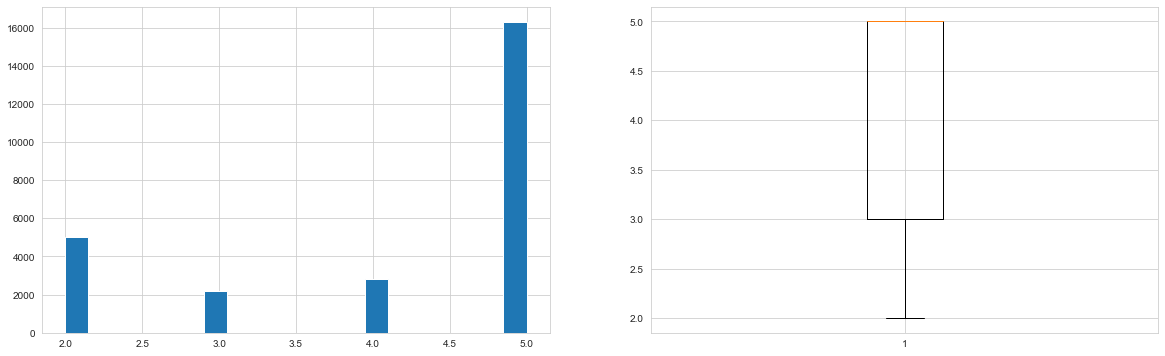

In [197]:
show_hist_box(df.doors)

In [198]:
drop_col('doors')

(26296, 35)
(26296, 34)


#  mileage

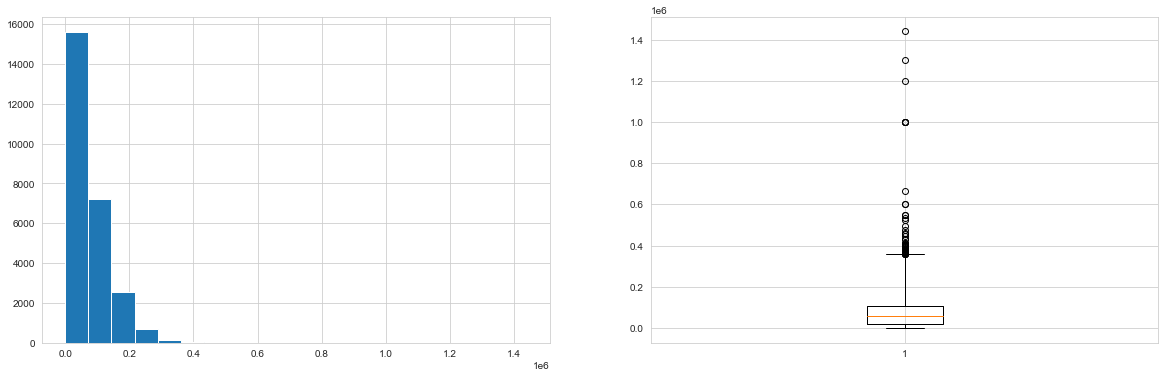

In [199]:
show_hist_box(df.mileage)

In [200]:
tail(df.mileage)

25915    433850.00
25906    448914.00
273      457379.00
6284     461626.00
19524    477000.00
3285     494457.00
17800    523992.00
3043     536388.00
13983    546888.00
17378    547000.00
13969    600000.00
26137    600001.00
12795    667128.00
20740    999999.00
3226     999999.00
7454    1000000.00
22252   1000001.00
11845   1199900.00
16817   1300000.00
18327   1440000.00
Name: mileage, dtype: float64

In [201]:
df[df.mileage > 1000000]

,make_model,make,model,price,body_type,age,fuel,country,type,warranty,mileage,gearbox,seller,seats,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,fuel_consumption_avg,address,latitude,longitude,cc,ss,em
11845,Seat Ibiza,Seat,Ibiza,10200.00,Compact,4.00,Diesel,Spain,Used,Yes,1199900.00,Manual,Dealer,5.00,1598.00,5.00,109.00,Front,4.00,Alloy wheels,1243.00,No,Cloth,1,efficient,95.00,70.00,3.70,"Poligono Industrial, 46691 Vallada, Valencia, ...",38.90,-0.68,standard,Safety Security Standard,Entertainment Media Standard
16817,Toyota Celica,Toyota,Celica,4500.00,Coupe,36.00,Benzine,Germany,Used,No,1300000.00,Manual,Private seller,4.00,1998.00,5.00,185.00,Front,4.00,"All season tyres, Alloy wheels (16""), Catalyti...",1161.00,No,Cloth,2,efficient,124.00,91.00,7.90,"79112, BW, Germany",47.98,7.72,premium,Safety Security Standard,Entertainment Media Standard
18327,Nissan Micra,Nissan,Micra,14400.00,Compact,3.00,Benzine,Spain,Used,Yes,1440000.00,Manual,Dealer,5.00,999.00,5.00,104.00,Front,3.00,Alloy wheels,1076.00,No,Cloth,4,inefficient,101.00,74.00,4.60,"Calle de San Miguel 7, 18110 Gabia Grande, Gra...",37.14,-3.67,premium,Safety Security Standard,Entertainment Media Standard
22252,Ford Fiesta,Ford,Fiesta,9990.00,Sedan,4.00,Benzine,Germany,Used,Yes,1000001.00,Manual,Dealer,5.00,1084.00,5.00,114.00,Front,3.00,"All season tyres, E10-enabled, Emergency tyre ...",1108.00,Yes,Cloth,1,efficient,71.00,52.00,5.10,"Nürnberger Str 51, 91126 Schwabach, Germany",49.34,11.02,premium_plus,Safety Security Premium,Entertainment Media Standard


In [202]:
df.shape

(26296, 34)

In [203]:
df.drop(df[df.mileage > 1000000].index,inplace = True)

In [204]:
df.shape

(26292, 34)

# seats

In [205]:
drop_col('seats')

(26292, 34)
(26292, 33)


# engine_size

In [206]:
first_looking('engine_size')

COLUMN NAME    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  447
--------------------------------
engine_size
1598.00    2154
999.00     2015
1461.00    1140
1969.00    1115
1998.00    1004
           ... 
2324.00       1
750.00        1
1270.00       1
1089.00       1
2473.00       1
Name: count, Length: 447, dtype: int64


In [207]:
df.engine_size.describe()

count   26292.00
mean     1726.61
std      1079.99
min         0.00
25%      1248.00
50%      1591.00
75%      1984.00
max     99900.00
Name: engine_size, dtype: float64

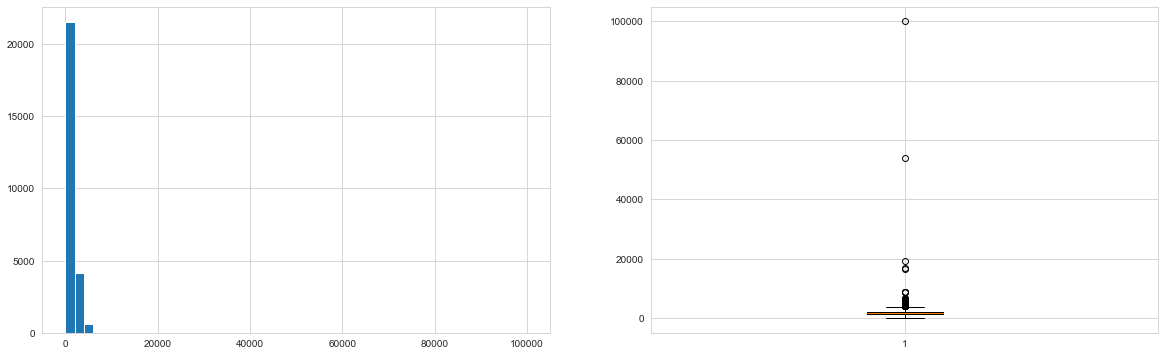

In [208]:
show_hist_box(df.engine_size, bins=50, whis=2.5)

In [209]:
head(df.engine_size)

14739   0.00
15484   0.00
4311    0.00
4512    0.00
23215   0.00
23233   0.00
23235   0.00
23260   0.00
4684    0.00
23277   0.00
23419   0.00
23425   0.00
23440   0.00
15254   0.00
23466   0.00
15816   0.00
23475   0.00
23504   0.00
15235   0.00
14808   0.00
Name: engine_size, dtype: float64

In [210]:
tail(df.engine_size)

682      6209.00
20867    6294.00
678      6300.00
672      6300.00
20741    6400.00
21110    6400.00
21107    6400.00
21101    6400.00
21098    6400.00
21039    6400.00
21182    6653.00
21053    8660.00
21082    8660.00
21094    8660.00
21055    8660.00
15685   16597.00
5384    16998.00
695     19194.00
20729   54009.00
16069   99900.00
Name: engine_size, dtype: float64

In [211]:
df.engine_size.value_counts().sort_index().head(20)

engine_size
0.00      377
1.00      133
2.00        9
4.00        2
5.00        4
20.00       1
200.00      1
289.00      9
300.00      1
332.00      1
498.00      2
499.00      5
500.00      2
549.00      1
600.00      1
650.00      2
652.00      2
698.00      1
750.00      1
767.00      5
Name: count, dtype: int64

In [212]:
# outliers
df.loc[df.engine_size > 8000,'engine_size'] = np.nan

In [213]:
engine_size_outliers = [4,5,20,200,289,300,332]
df.loc[df.engine_size.isin(engine_size_outliers),'engine_size'] = np.nan

In [214]:
df.engine_size.isna().sum()

28

In [215]:
df_e = fill_with_mode('engine_size',groups=['make_model','body_type','fuel','age','country','power_hp'])

engine_size
False    26264
True        28
Name: count, dtype: int64
['make_model', 'body_type', 'fuel', 'age', 'country', 'power_hp']
engine_size
False    26270
True        22
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel', 'age', 'country']
engine_size
False    26283
True         9
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel', 'age']
engine_size
False    26285
True         7
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type', 'fuel']
engine_size
False    26291
True         1
Name: count, dtype: int64
----------------------------------------
['make_model', 'body_type']
engine_size
False    26291
True         1
Name: count, dtype: int64
----------------------------------------
['make_model']
engine_size
False    26292
Name: count, dtype: int64
----------------------------------------


In [216]:
df.compare(df_e)

engine_size        
             self   other
88            NaN 1950.00
695           NaN 3200.00
3158          NaN 1998.00
5055          NaN 1998.00
5384          NaN 1998.00
12893         NaN 1498.00
15195         NaN 1332.00
15685         NaN 1598.00
16069         NaN 1000.00
16568         NaN 1998.00
20729         NaN 4600.00
21035         NaN 4700.00
21053         NaN 5038.00
21055         NaN 5038.00
21081         NaN 4700.00
21082         NaN 5038.00
21091         NaN 4700.00
21093         NaN 4700.00
21094         NaN 5038.00
21109         NaN 4700.00
21111         NaN 4700.00
21112         NaN 4700.00
21134         NaN 4700.00
21138         NaN 4700.00
21216         NaN 4951.00
21256         NaN 5038.00
21257         NaN 5038.00
21261         NaN 4951.00

In [217]:
df = df_e.copy()
del df_e

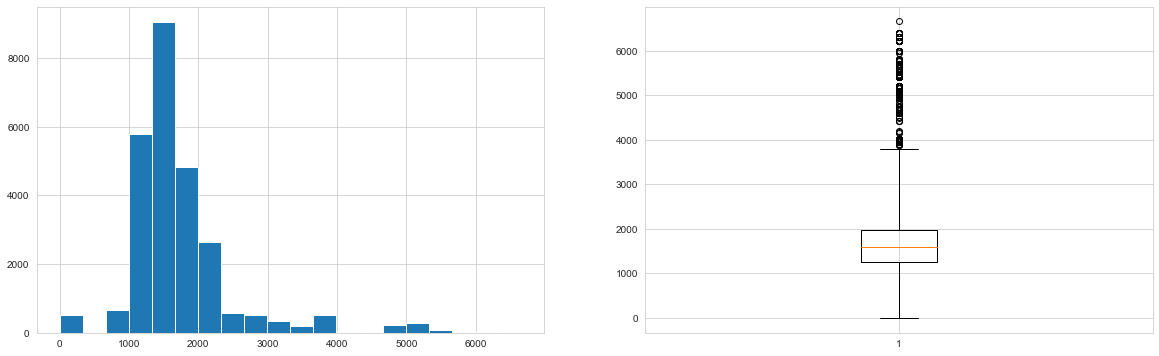

In [218]:
show_hist_box(df.engine_size,bins=20,whis = 2.5)

# gears

In [219]:
first_looking('gears')

COLUMN NAME    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
gears
6.00     11362
5.00      7274
7.00      2518
8.00      2006
1.00      1267
9.00      1143
4.00       358
10.00      261
0.00        54
3.00        46
2.00         3
Name: count, dtype: int64


In [220]:
df.loc[((df.gears == 0) | (df.gears > 8)), 'gears'] = np.nan

In [221]:
df.gears.isna().sum()

1458

In [222]:
df_g = fill_with_mode('gears',groups=['make','make_model','body_type','fuel','country','gearbox','power_hp','age'])

gears
False    24834
True      1458
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'fuel', 'country', 'gearbox', 'power_hp', 'age']
gears
False    24866
True      1426
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country', 'gearbox', 'power_hp']
gears
False    25014
True      1278
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country', 'gearbox']
gears
False    25410
True       882
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country']
gears
False    25477
True       815
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel']
gears
False    25616
True       676
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
gears
False    25697
True       595
Name: count, dtype: int

In [223]:
df.compare(df_g)

gears      
       self other
1       NaN  1.00
24      NaN  7.00
33      NaN  5.00
73      NaN  7.00
88      NaN  7.00
...     ...   ...
22147   NaN  1.00
23112   NaN  5.00
23303   NaN  1.00
26054   NaN  8.00
26230   NaN  8.00

[1458 rows x 2 columns]

In [224]:
df = df_g.copy()
del df_g

In [225]:
df.drop(df[df.gears==2].index,inplace=True)

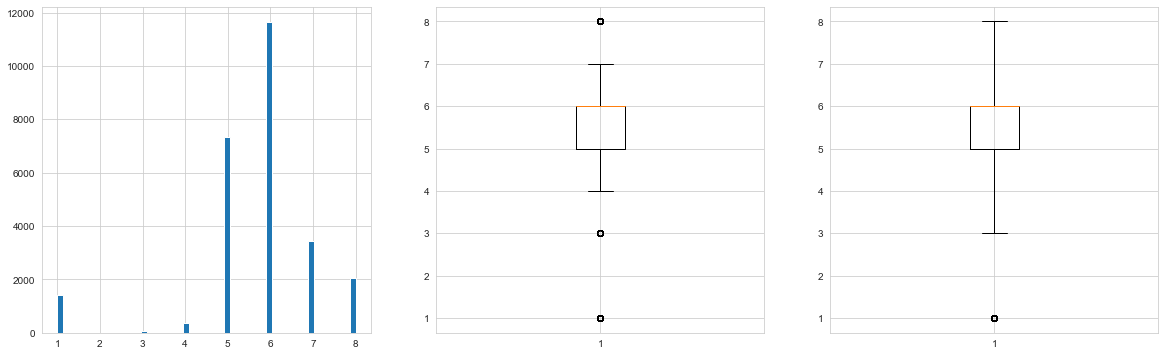

In [226]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.hist(df.gears, bins=50)

plt.subplot(132)
plt.boxplot(df.gears, whis=1.5)

plt.subplot(133)
plt.boxplot(df.gears, whis=2.5)

plt.show()

# empty_weight

In [227]:
first_looking('empty_weight')

COLUMN NAME    :  empty_weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1215
--------------------------------
empty_weight
1395.00    414
1280.00    413
1165.00    390
1320.00    356
1055.00    353
          ... 
2650.00      1
720.00       1
932.00       1
946.00       1
1517.00      1
Name: count, Length: 1215, dtype: int64


In [228]:
df.empty_weight.describe()

count   26289.00
mean     1408.64
std       317.69
min        75.00
25%      1200.00
50%      1370.00
75%      1577.00
max     15590.00
Name: empty_weight, dtype: float64

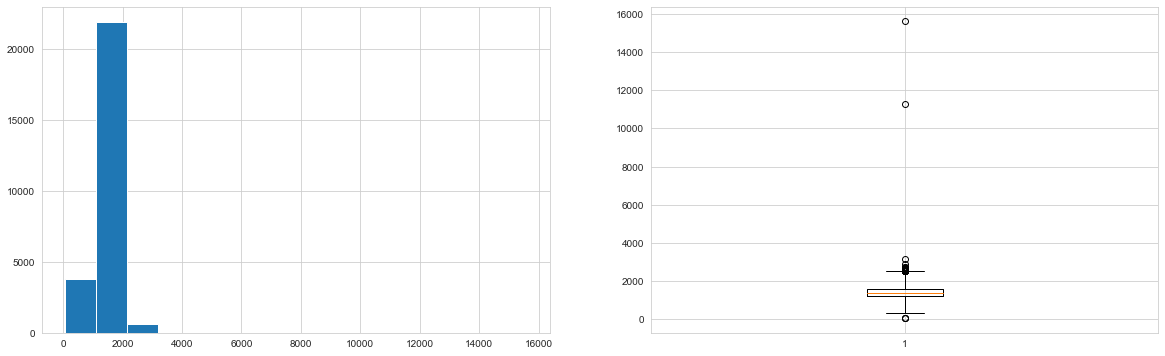

In [229]:
show_hist_box(df.empty_weight,bins = 15,whis = 2.5)

In [230]:
head(df.empty_weight)

13608    75.00
13625    75.00
13687    75.00
5959    347.00
5997    375.00
4700    473.00
5584    474.00
4006    525.00
5614    562.00
4757    562.00
5734    562.00
5547    562.00
5717    562.00
4953    562.00
5235    562.00
4652    562.00
10335   600.00
9390    600.00
9386    600.00
11884   600.00
Name: empty_weight, dtype: float64

In [231]:
tail(df.empty_weight)

1336     2595.00
1235     2595.00
1307     2610.00
1443     2610.00
1225     2610.00
1384     2610.00
1296     2610.00
1320     2610.00
1411     2612.00
17378    2650.00
2103     2655.00
1589     2680.00
2144     2680.00
1167     2690.00
17362    2725.00
5219     2750.00
19470    2900.00
1258     3150.00
20546   11246.00
6653    15590.00
Name: empty_weight, dtype: float64

In [232]:
df.loc[(df["empty_weight"] > 3150), 'empty_weight'] = np.nan

In [233]:
df.loc[(df["empty_weight"] < 562), 'empty_weight'] = np.nan

In [234]:
df.empty_weight.isna().sum()

10

In [235]:
df_e = fill_with_mode('empty_weight',groups=['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox', 'power_hp'])

empty_weight
False    26279
True        10
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox', 'power_hp']
empty_weight
False    26282
True         7
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country', 'age', 'gearbox']
empty_weight
False    26282
True         7
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country', 'age']
empty_weight
False    26282
True         7
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel', 'country']
empty_weight
False    26282
True         7
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'fuel']
empty_weight
False    26287
True         2
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
empty_weight
False    2628

In [236]:
df.compare(df_e)

empty_weight        
              self   other
4006           NaN 1355.00
4700           NaN  562.00
5584           NaN  562.00
5959           NaN  562.00
5997           NaN  562.00
6653           NaN 1547.00
13608          NaN 2107.00
13625          NaN 2107.00
13687          NaN 2107.00
20546          NaN 1242.00

In [237]:
df = df_e.copy()
del df_e

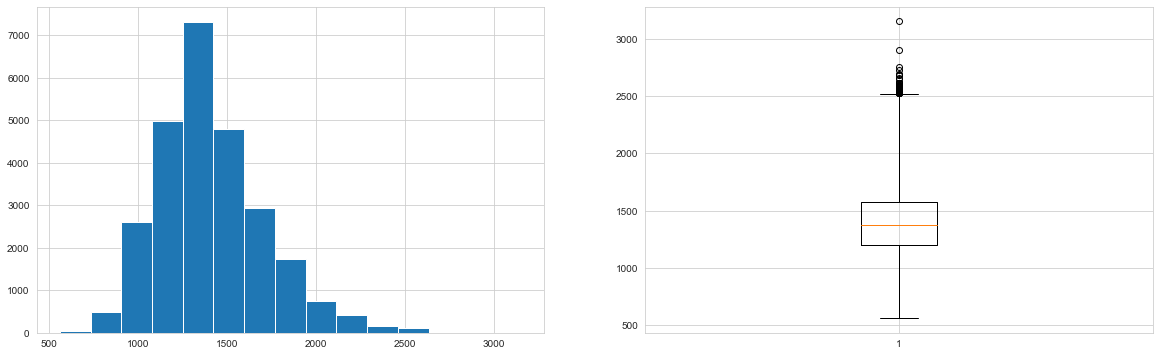

In [238]:
show_hist_box(df.empty_weight,bins = 15,whis = 2.5)

# co2_emissions

<h2>[The Range] of CO2 Emissions for Cars</h2> <p>The range of CO2 emissions for cars can also vary widely depending on the make and model of the car, as well as the type of fuel it uses and its engine size. CO2 emissions are typically measured in grams per kilometer (g/km) or grams per mile (g/mi).</p> <p>The range of CO2 emissions for cars can vary from less than 100 g/km to more than 500 g/km. However, most modern cars have CO2 emissions in the range of 100-200 g/km. Some common ranges of CO2 emissions for cars are:</p> <ul> <li>Electric cars: 0 g/km (since they emit no CO2)</li> <li>Hybrid cars: 90-120 g/km</li> <li>Small cars and subcompact cars: 100-150 g/km</li> <li>Mid-size cars and family sedans: 120-200 g/km</li> <li>Large cars and luxury sedans: 150-250 g/km</li> <li>Sports cars and high-performance vehicles: 250-500 g/km or more</li> </ul> <p>It's important to note that the CO2 emissions of a car are influenced by a variety of factors, including the type of fuel it uses, its engine size and power output, its weight, and its aerodynamics. In addition, [emissions standards] and regulations vary by country and region, which can also affect the range of CO2 emissions for cars.</p>

In [239]:
first_looking('co2_emissions')

COLUMN NAME    :  co2_emissions
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  424
--------------------------------
co2_emissions
0.00      2881
117.00     664
129.00     537
115.00     505
130.00     491
          ... 
69.00        1
72.50        1
144.25       1
266.00       1
53.00        1
Name: count, Length: 424, dtype: int64


In [240]:
df.co2_emissions.describe()

count   26289.00
mean      127.01
std       129.10
min         0.00
25%       105.00
50%       124.00
75%       154.00
max     15168.00
Name: co2_emissions, dtype: float64

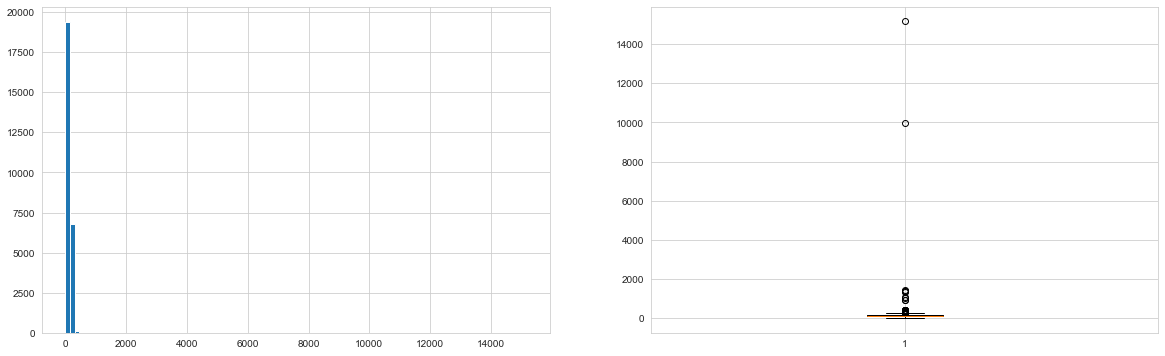

In [241]:
show_hist_box(df.co2_emissions,bins=100,whis=2.5)

In [242]:
head(df.co2_emissions)

19996   0.00
11157   0.00
19962   0.00
4548    0.00
4561    0.00
11154   0.00
14778   0.00
19961   0.00
14779   0.00
4579    0.00
19959   0.00
14780   0.00
19958   0.00
4590    0.00
19957   0.00
4542    0.00
19956   0.00
4595    0.00
14781   0.00
4598    0.00
Name: co2_emissions, dtype: float64

In [243]:
tail(df.co2_emissions)

21163     350.00
20939     350.00
1464      373.00
1262      377.00
20955     394.00
18964     398.00
20927     399.00
593       400.00
25567     414.00
21305     420.00
20207     910.00
21390     940.00
25146    1000.00
9035     1060.00
11484    1320.00
4374     1360.00
9908     1390.00
17512    1410.00
20296    9954.00
9652    15168.00
Name: co2_emissions, dtype: float64

In [244]:
df.loc[df.co2_emissions > 400]

,make_model,make,model,price,body_type,age,fuel,country,type,warranty,mileage,gearbox,seller,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,fuel_consumption_avg,address,latitude,longitude,cc,ss,em
4374,Opel Astra,Opel,Astra,17880.00,Sedan,3.00,Benzine,Germany,Used,No,38455.00,Automatic,Dealer,1399.00,6.00,1360.00,Front,4.00,"Catalytic Converter, Touch screen",1308.00,Yes,Cloth,1,efficient,150.00,110.00,5.70,"Rheinberger Str 193, 47445 Moers, Germany",51.47,6.63,premium,Safety Security Premium,Entertainment Media Premium
9035,Peugeot 308,Peugeot,308,17900.00,Sedan,2.00,Diesel,Italy,Used,No,42743.00,Automatic,Dealer,1499.00,8.00,1060.00,Front,4.00,"Alloy wheels, Electronic parking brake, Sport ...",1395.00,No,Part/Full Leather,1,efficient,131.00,96.00,4.00,"Via Enrico Fermi 27, 03100 Frosinone Frosinone...",41.62,13.31,premium,Safety Security Premium,Entertainment Media Premium
9652,Fiat 124 Spider,Fiat,124 Spider,18488.00,Convertible,4.00,Benzine,Germany,Used,No,69347.00,Manual,Dealer,1368.00,6.00,15168.00,Rear,4.00,"Alloy wheels, Catalytic Converter, Voice Control",1125.00,No,Cloth,1,inefficient,140.00,103.00,6.40,"Gutenberg Str 37, 52511 Geilenkirchen, Germany",50.97,6.09,standard,Safety Security Standard,Entertainment Media Standard
9908,Fiat 500,Fiat,500,19900.00,Convertible,5.00,Benzine,Italy,Used,No,58000.00,Automatic,Dealer,1368.00,5.00,1390.00,Front,4.00,"Alloy wheels (15""), Voice Control",980.00,No,Part/Full Leather,1,inefficient,159.00,117.00,6.50,"Via Enrico Fermi 27, 03100 Frosinone Frosinone...",41.62,13.31,premium,Safety Security Premium,Entertainment Media Premium
11484,Fiat Tipo,Fiat,Tipo,11500.00,Sedan,6.00,Benzine,Italy,Used,Yes,82223.00,Manual,Dealer,1368.00,6.00,1320.00,Front,4.00,"All season tyres, Alloy wheels (16""), Catalyti...",1225.00,No,Cloth,1,efficient,95.00,70.00,5.70,"Via della Cupola 249, 50145 Florence Florence,...",43.80,11.20,premium,Safety Security Premium,Entertainment Media Standard
17512,Toyota Avensis,Toyota,Avensis,8000.00,Station wagon,11.00,Diesel,Italy,Used,Yes,145500.00,Manual,Dealer,1998.00,6.00,1410.00,Front,4.00,Alloy wheels,1570.00,No,Cloth,2,efficient,126.00,93.00,5.40,"Via della Cupola 249, 50145 Florence Florence,...",43.80,11.20,premium,Safety Security Standard,Entertainment Media Standard
20207,Ford Fiesta,Ford,Fiesta,29440.00,Compact,1.00,Benzine,Germany,Demonstration,Yes,12500.00,Manual,Dealer,1496.00,6.00,910.00,Front,3.00,"Alloy wheels, Catalytic Converter, Sport seats...",1242.00,Yes,Part/Full Leather,1,inefficient,200.00,147.00,6.80,"Lübecker Straße 12, 41540 Dormagen, Germany",51.09,6.81,premium_plus,Safety Security Premium,Entertainment Media Premium
20296,Ford Focus,Ford,Focus,25988.00,Compact,2.00,Benzine,Germany,Used,No,16397.00,Automatic,Dealer,998.00,8.00,9954.00,Front,3.00,"Alloy wheels, Shift paddles, Sport seats, Spor...",1371.00,No,Cloth,2,efficient,125.00,92.00,4.20,"Gutenberg Str 37, 52511 Geilenkirchen, Germany",50.97,6.09,premium_plus,Safety Security Premium,Entertainment Media Premium
21305,Ford Mustang,Ford,Mustang,208101.00,Coupe,1.00,Benzine,Austria,Used,No,1392.00,Automatic,Dealer,4949.00,5.00,420.00,Rear,8.00,"Alloy wheels, Automatically dimming interior m...",1725.00,Yes,Part/Full Leather,1,inefficient,751.00,552.00,12.90,"Mühlweg 52, 8402 Werndorf, Austria",46.92,15.50,premium_plus,Safety Security Premium,Entertainment Media Premium
21390,Ford Edge,Ford,Edge,40650.00,Off-Road/Pick-up,2.00,Diesel,Germany,Used,No,27214.00,Automatic,Dealer,1995.00,8.00,940.00,4WD,4.00,"Alloy wheels, Roof rack, Shift paddles, Sport ...",2116.00,Yes,Part/Full Leather,1,efficient,238.00,175.00,6.60,"Nevigeser Straße 151, 42553 Velbert, Germany",51.32,7.06,premium_plus,Safety Security Premium Plus,Entertainment Media Standard


In [245]:
df.loc[df.co2_emissions > 370,'co2_emissions'] = np.nan

In [246]:
df.co2_emissions.isna().sum()

18

In [247]:
df_co = fill_with_median('co2_emissions',groups=['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp', 'age'])

co2_emissions
False    26271
True        18
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp', 'age']
co2_emissions
False    26277
True        12
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
co2_emissions
False    26283
True         6
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
co2_emissions
False    26285
True         4
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
co2_emissions
False    26285
True         4
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
co2_emissions
False    26286
True         3
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
co2_e

In [248]:
df.compare(df_co)

co2_emissions       
               self  other
593             NaN 272.75
1262            NaN 154.00
1464            NaN 330.00
4374            NaN 130.00
9035            NaN  96.00
9652            NaN 148.00
9908            NaN 115.50
11484           NaN 133.00
17512           NaN 155.00
18964           NaN 147.50
20207           NaN 136.00
20296           NaN 114.00
20927           NaN 320.00
20955           NaN 320.00
21305           NaN 327.00
21390           NaN 170.00
25146           NaN 174.00
25567           NaN 117.00

In [249]:
df = df_co.copy()
del df_co

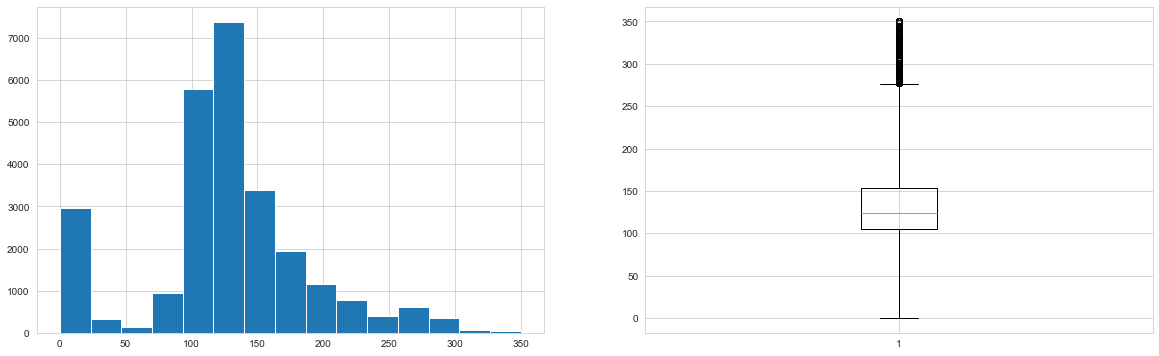

In [250]:
show_hist_box(df.co2_emissions,bins=15,whis=2.5)

In [251]:
tail(df.co2_emissions)

2097    335.00
17183   336.00
17291   336.00
829     338.00
21132   339.00
860     340.00
21554   340.00
1406    341.00
18828   342.00
17118   343.00
1452    344.00
1910    345.00
1503    348.00
20939   350.00
21301   350.00
21163   350.00
21303   350.00
20992   350.00
21030   350.00
21031   350.00
Name: co2_emissions, dtype: float64

# fuel_consumption_avg

<h2>The Average Fuel Consumption Range for Cars</h2> <p>The average fuel consumption range for cars can vary widely depending on several factors, such as the make and model of the car, its engine size and power output, the type of fuel it uses, the [driving conditions], and the driving style.</p> <p>In general, fuel consumption is measured in liters per 100 kilometers (L/100 km) or miles per gallon (mpg). The average fuel consumption range for cars can vary from less than 5 L/100 km or more than 30 mpg to more than 20 L/100 km or less than 10 mpg. However, most modern cars have average fuel consumption in the range of 6-10 L/100 km or 30-40 mpg.</p> <p>Some common ranges of average fuel consumption for cars are:</p> <ul> <li>Small cars and subcompact cars: 5-7 L/100 km or 40-50 mpg</li> <li>Mid-size cars and family sedans: 6-8 L/100 km or 30-40 mpg</li> <li>Large cars and luxury sedans: 8-12 L/100 km or 20-30 mpg</li> <li>Sports cars and high-performance vehicles: 10-20 L/100 km or 10-20 mpg</li> </ul> <p>It's important to note that fuel consumption can vary widely depending on the driving conditions and driving style. For example, driving in heavy traffic or in hilly terrain can increase fuel consumption, while driving on the highway at a constant speed can improve fuel economy. In addition, hybrid and electric cars have significantly better fuel efficiency than traditional gasoline-powered cars.</p>

In [252]:
first_looking('fuel_consumption_avg')

COLUMN NAME    :  fuel_consumption_avg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  254
--------------------------------
fuel_consumption_avg
4.90     973
2.36     964
5.00     940
5.10     803
4.50     735
        ... 
5.30       1
3.33       1
56.00      1
12.15      1
6.25       1
Name: count, Length: 254, dtype: int64


In [253]:
df.fuel_consumption_avg.describe()

count   26289.00
mean        5.80
std         2.77
min         0.50
25%         4.40
50%         5.30
75%         6.70
max        99.90
Name: fuel_consumption_avg, dtype: float64

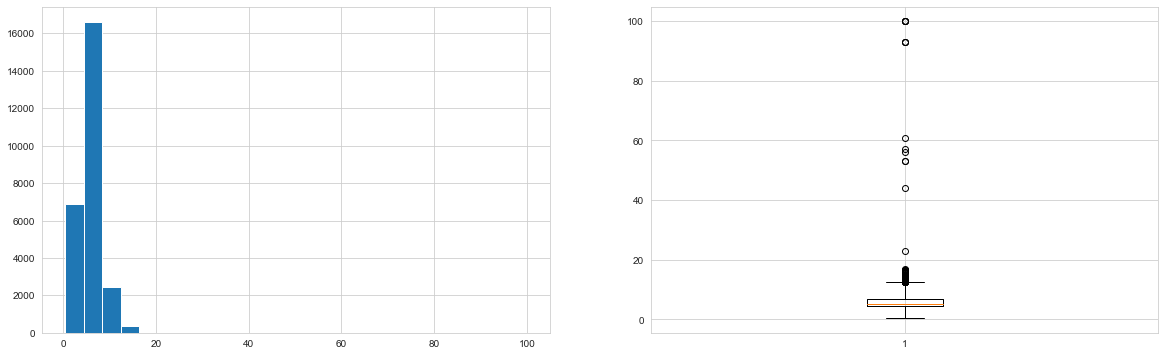

In [254]:
show_hist_box(df.fuel_consumption_avg,bins=25,whis=2.5)

In [255]:
head(df.fuel_consumption_avg)

10956   0.50
1850    0.60
2320    0.60
1776    0.60
2311    0.60
1895    0.60
1982    0.70
2185    0.70
1985    0.70
2306    0.70
19532   0.70
19678   0.70
2236    0.80
1167    0.90
18135   1.00
129     1.00
19051   1.00
4572    1.00
8710    1.00
1751    1.00
Name: fuel_consumption_avg, dtype: float64

In [256]:
tail(df.fuel_consumption_avg)

20646   16.20
838     16.40
1182    16.50
1219    16.50
593     16.70
20955   16.80
20741   23.00
19338   44.00
23486   53.00
23326   53.00
18002   56.00
6369    57.00
1731    61.00
20403   93.00
20476   93.00
20420   93.00
18254   99.90
18253   99.90
22363   99.90
257     99.90
Name: fuel_consumption_avg, dtype: float64

In [257]:
df[df.fuel_consumption_avg > 16.80]

,make_model,make,model,price,body_type,age,fuel,country,type,warranty,mileage,gearbox,seller,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,fuel_consumption_avg,address,latitude,longitude,cc,ss,em
257,Mercedes-Benz A 180,Mercedes-Benz,A 180,32750.00,Compact,2.00,Benzine,Netherlands,Used,Yes,49444.00,Automatic,Dealer,1332.00,7.00,138.00,Front,4.00,"Alloy wheels (17""), Ambient lighting, Automati...",1265.00,Yes,Part/Full Leather,2,inefficient,136.00,100.00,99.90,"Trondheimweg 5, 9723 TX Groningen, Netherlands",53.21,6.62,premium_plus,Safety Security Premium Plus,Entertainment Media Standard
1731,Mercedes-Benz E 200,Mercedes-Benz,E 200,22480.00,Station wagon,8.00,Benzine,Germany,Used,No,87036.00,Automatic,Dealer,1991.00,7.00,142.00,Rear,4.00,"Alloy wheels (17""), Automatically dimming inte...",1735.00,Yes,Part/Full Leather,2,efficient,184.00,135.00,61.00,"Am Flughafen 1, 12529 Schönefeld, Germany",52.38,13.54,premium_plus,Safety Security Premium,Entertainment Media Standard
6369,Renault Megane,Renault,Megane,17488.00,Station wagon,3.00,Benzine,Germany,Used,No,24577.00,Manual,Dealer,1332.00,6.00,139.00,Front,4.00,"Alloy wheels, Catalytic Converter, Touch screen",1362.00,No,Part/Full Leather,1,inefficient,140.00,103.00,57.00,"Von-Drais Str 2, 77855 Achern, Germany",48.64,8.06,premium_plus,Safety Security Premium,Entertainment Media Standard
18002,Toyota Yaris,Toyota,Yaris,17490.00,Sedan,0.00,Benzine,Germany,Used,Yes,15.00,Manual,Dealer,998.00,5.00,127.00,Front,3.00,Catalytic Converter,1100.00,No,Cloth,1,efficient,72.00,53.00,56.00,"Kantstr 20, 23566 Lübeck, Germany",53.87,10.72,premium,Safety Security Premium,Entertainment Media Premium
18253,Nissan Qashqai,Nissan,Qashqai,21995.00,Compact,3.00,Benzine,Netherlands,Used,Yes,57706.00,Manual,Dealer,1332.00,6.00,121.00,Front,4.00,"Automatically dimming interior mirror, Roof ra...",1275.00,Yes,Part/Full Leather,2,efficient,141.00,104.00,99.90,"Trondheimweg 5, 9723 TX Groningen, Netherlands",53.21,6.62,premium_plus,Safety Security Premium Plus,Entertainment Media Premium
18254,Nissan Qashqai,Nissan,Qashqai,19595.00,Compact,5.00,Benzine,Netherlands,Used,Yes,60888.00,Manual,Dealer,1197.00,6.00,129.00,Front,4.00,"Automatically dimming interior mirror, Roof rack",1250.00,Yes,Part/Full Leather,2,efficient,116.00,85.00,99.90,"Trondheimweg 5, 9723 TX Groningen, Netherlands",53.21,6.62,premium_plus,Safety Security Premium,Entertainment Media Standard
19338,Nissan Qashqai,Nissan,Qashqai,15400.00,Off-Road/Pick-up,5.00,Diesel,Belgium,Used,Yes,101361.00,Manual,Dealer,1461.00,6.00,99.00,Front,4.00,"Alloy wheels, Automatically dimming interior m...",1365.00,Yes,Cloth,1,efficient,110.00,81.00,44.00,"Nieuwpoortsteenweg 46, 8670 Koksijde",51.12,2.69,premium,Safety Security Premium,Entertainment Media Standard
20403,Ford Focus,Ford,Focus,16595.00,Compact,4.00,Diesel,Netherlands,Used,Yes,99112.00,Manual,Dealer,1499.00,6.00,93.00,Front,4.00,"Alloy wheels (17""), Spoiler, Sport seats, Spor...",1263.00,Yes,Cloth,2,efficient,120.00,88.00,93.00,"Trondheimweg 5, 9723 TX Groningen, Netherlands",53.21,6.62,premium,Safety Security Premium Plus,Entertainment Media Premium
20420,Ford Focus,Ford,Focus,16900.00,Compact,3.00,Diesel,Netherlands,Used,Yes,126742.00,Manual,Dealer,1499.00,6.00,93.00,Front,4.00,"Automatically dimming interior mirror, Spoiler...",1263.00,Yes,Cloth,2,efficient,120.00,88.00,93.00,"Trondheimweg 5, 9723 TX Groningen, Netherlands",53.21,6.62,premium,Safety Security Premium Plus,Entertainment Media Premium
20476,Ford Focus,Ford,Focus,19999.00,Compact,3.00,Diesel,Netherlands,Used,No,49387.00,Manual,Dealer,1499.00,6.00,93.00,Front,4.00,"Alloy wheels (16""), Automatically dimming inte...",1263.00,Yes,Part/Full Leather,1,efficient,120.00,88.00,93.00,"Kapitein Nemostraat 34, 7821 AC Emmen, Netherl...",52.77,6.92,premium,Safety Security Premium Plus,Entertainment Media Premium


In [258]:
df.loc[df.fuel_consumption_avg > 16.80,'fuel_consumption_avg'] = np.nan

In [259]:
df.fuel_consumption_avg.isna().sum()

14

In [260]:
df_f = fill_with_median('fuel_consumption_avg',groups=['make','make_model','body_type','country','gearbox','fuel','power_hp'])

fuel_consumption_avg
False    26275
True        14
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel', 'power_hp']
fuel_consumption_avg
False    26286
True         3
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox', 'fuel']
fuel_consumption_avg
False    26287
True         2
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country', 'gearbox']
fuel_consumption_avg
False    26287
True         2
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type', 'country']
fuel_consumption_avg
False    26289
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
fuel_consumption_avg
False    26289
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
fuel_consumption_avg
False    26289
Name: count, dtype:

In [261]:
df.compare(df_f)

fuel_consumption_avg      
                      self other
257                    NaN  5.30
1731                   NaN  6.35
6369                   NaN  5.40
18002                  NaN  4.50
18253                  NaN  7.60
18254                  NaN  7.60
19338                  NaN  3.80
20403                  NaN  3.50
20420                  NaN  3.50
20476                  NaN  3.50
20741                  NaN 12.80
22363                  NaN  4.50
23326                  NaN  5.40
23486                  NaN  5.40

In [262]:
df = df_f.copy()
del df_f

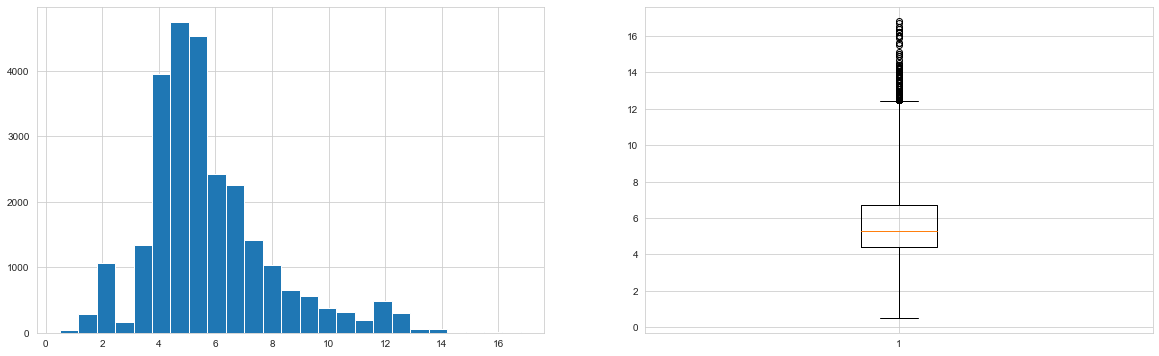

In [263]:
show_hist_box(df.fuel_consumption_avg,bins=25,whis=2.5)

# previous_owner

In [264]:
first_looking('previous_owner')

COLUMN NAME    :  previous_owner
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13
--------------------------------
previous_owner
1     17198
2      6635
3      1617
4       453
5       188
6        79
7        54
8        41
9        16
12        4
10        2
14        1
13        1
Name: count, dtype: int64


In [265]:
df[df.previous_owner > 10]

,make_model,make,model,price,body_type,age,fuel,country,type,warranty,mileage,gearbox,seller,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,power_kw,fuel_consumption_avg,address,latitude,longitude,cc,ss,em
7324,Peugeot 207,Peugeot,207,2945.00,Convertible,15.00,Benzine,Netherlands,Used,Yes,188790.00,Manual,Dealer,1598.00,5.00,155.00,Front,4.00,"Alloy wheels, Sport seats",1327.00,Yes,Cloth,14,inefficient,120.00,88.00,6.50,"Van der Giessenweg 2, 2921 LP Krimpen aan den ...",51.91,4.58,premium,Safety Security Standard,Entertainment Media Standard
7597,Peugeot 306,Peugeot,306,1744.00,Convertible,25.00,Benzine,Netherlands,Used,No,128646.00,Manual,Dealer,1998.00,5.00,0.00,Front,4.00,Alloy wheels,1245.00,No,Part/Full Leather,13,efficient,132.00,97.00,8.50,"Amersfoortsestraat 15A, 3769 AD Soesterberg, N...",52.12,5.30,premium,Safety Security Standard,Entertainment Media Standard
18850,Nissan 370Z,Nissan,370Z,20950.00,Coupe,12.00,Benzine,Netherlands,Used,No,114117.00,Automatic,Dealer,3696.00,7.00,245.00,Rear,6.00,"Alloy wheels (19"")",1483.00,No,Part/Full Leather,12,inefficient,328.00,241.00,10.50,"Stephensonstraat 11, 7903 AS Hoogeveen, Nether...",52.73,6.51,premium,Safety Security Premium,Entertainment Media Standard
25874,Volvo V70,Volvo,V70,12950.00,Station wagon,25.00,Benzine,Netherlands,Used,No,342514.00,Automatic,Dealer,2319.00,5.00,0.00,4WD,5.00,"Alloy wheels, Roof rack, Spoiler, Sport suspen...",1651.00,Yes,Part/Full Leather,12,efficient,241.00,177.00,11.50,"Gerdina's Hof 33, 4191 MX Geldermalsen, Nether...",51.87,5.30,premium,Safety Security Standard,Entertainment Media Standard
25904,Volvo 945,Volvo,945,5900.00,Station wagon,25.00,LPG/CNG,Italy,Used,Yes,169000.00,Manual,Dealer,1986.00,5.00,131.00,Rear,4.00,Alloy wheels,1423.00,Yes,Cloth,12,efficient,155.00,114.00,10.20,"Via Rocciamelone 7/C, 10143 Turin Turin, Italy",45.08,7.65,premium,Safety Security Standard,Entertainment Media Standard
26075,Volvo S70,Volvo,S70,2699.00,Sedan,25.00,Benzine,Spain,Used,No,241764.00,Manual,Dealer,2435.00,5.00,168.00,Front,5.00,Alloy wheels,1370.00,No,Part/Full Leather,12,efficient,126.00,93.00,10.00,"Avenida de Sevilla 652, 06200 Almendralejo, Ba...",38.67,-6.39,premium,Safety Security Standard,Entertainment Media Standard


In [266]:
df.loc[df.previous_owner > 10,'previous_owner'] = np.nan

In [267]:
df.previous_owner.isna().sum()

6

In [268]:
df.drop(df.loc[df.previous_owner.isna()].index, inplace = True)

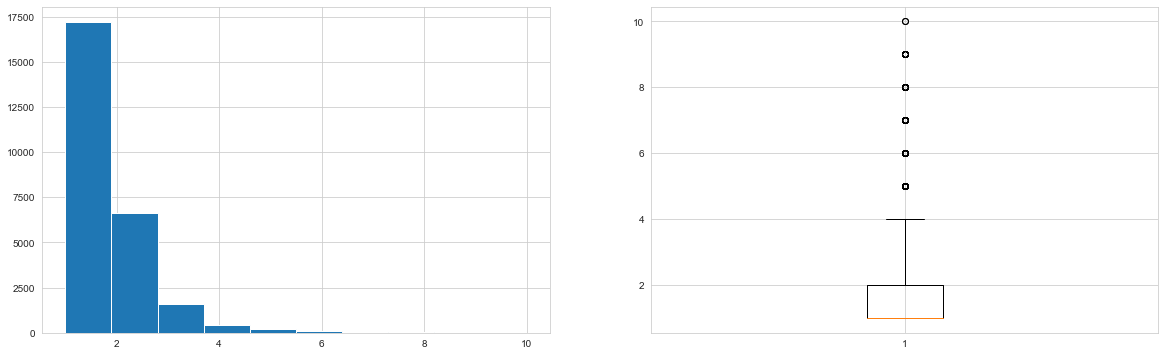

In [269]:
show_hist_box(df.previous_owner,bins=10,whis=2.5)

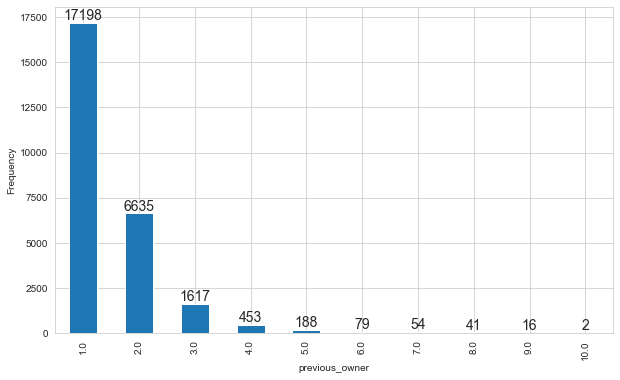

In [270]:
freq_bar(df.previous_owner)

# age

<h2>Categorization of Cars According to Their Age</h2>

<p>Cars can be categorized according to their age in different ways, depending on the context and purpose of the categorization. Here are a few common ways to categorize cars based on their age:</p>

<ol>
  <li>New cars: These are cars that have never been owned or registered before and are typically the latest models from a particular manufacturer.</li>
  <li>Used cars: These are cars that have been previously owned or registered by one or more owners. They may vary in age from just a few months to several years old.</li>
  <li>Classic cars: These are cars that are at least 20 years old and are considered to be of historical or cultural significance. They may be rare or collectible and often have unique features or designs.</li>
  <li>Vintage cars: These are cars that were manufactured between the 1910s and 1930s and are considered to be of historical significance. They often have hand-cranked engines and other unique features.</li>
  <li>Antique cars: These are cars that are at least 45 years old and are considered to be of historical or cultural significance. They may be rare or collectible and often have unique features or designs.</li>
  <li>Modern classic cars: These are cars that are at least 10 years old but less than 20 years old and are considered to be of cultural or aesthetic significance. They may have unique designs, features, or performance capabilities.</li>
</ol>

<p>It's important to note that these categorizations can vary depending on the context and the criteria used to define them. For example, some organizations or events may have specific criteria for what qualifies as a classic or vintage car, while other categorizations may be based primarily on the age of the car.</p>

In [271]:
first_looking('age')

COLUMN NAME    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  72
--------------------------------
age
3.00      3415
4.00      3203
0.00      2790
1.00      2685
2.00      2343
          ... 
122.00       2
76.00        1
93.00        1
70.00        1
68.00        1
Name: count, Length: 72, dtype: int64


In [272]:
df.age.describe()

count   26283.00
mean        6.65
std         8.26
min         0.00
25%         2.00
50%         4.00
75%         8.00
max       122.00
Name: age, dtype: float64

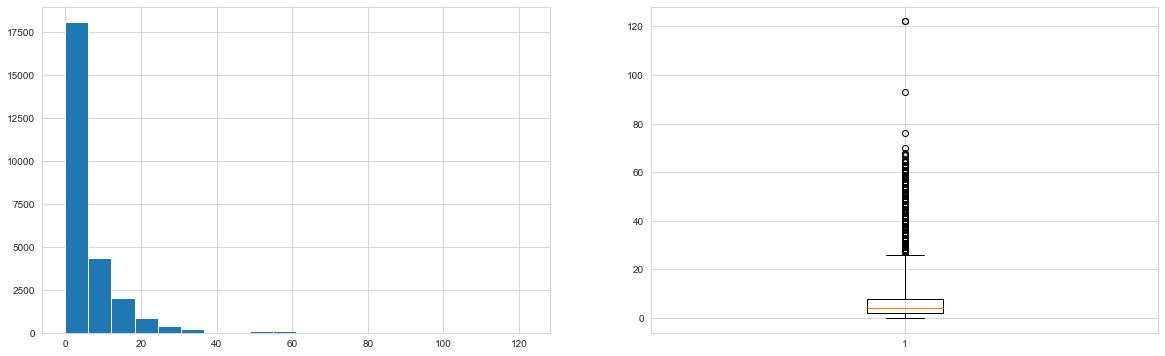

In [273]:
show_hist_box(df.age)

In [274]:
tail(df.age)

10061    62.00
25081    62.00
20809    63.00
13587    63.00
20728    64.00
764      64.00
20739    64.00
20862    65.00
690      65.00
3089     65.00
20812    67.00
20759    67.00
20717    67.00
20846    67.00
25112    68.00
749      70.00
9019     76.00
20603    93.00
21437   122.00
24111   122.00
Name: age, dtype: float64

In [275]:
df[df.age > 20].shape

(1475, 33)

In [276]:
old_cars  = df.loc[df.age > 20].index

In [277]:
df.shape

(26283, 33)

In [278]:
df.drop(old_cars,inplace=True)

In [279]:
df.shape

(24808, 33)

In [280]:
df.age.value_counts()

age
3.00     3415
4.00     3203
0.00     2790
1.00     2685
2.00     2343
5.00     2275
6.00     1385
7.00     1125
8.00      855
9.00      657
10.00     603
11.00     600
12.00     505
15.00     404
13.00     374
14.00     373
16.00     355
17.00     279
18.00     229
19.00     194
20.00     159
Name: count, dtype: int64

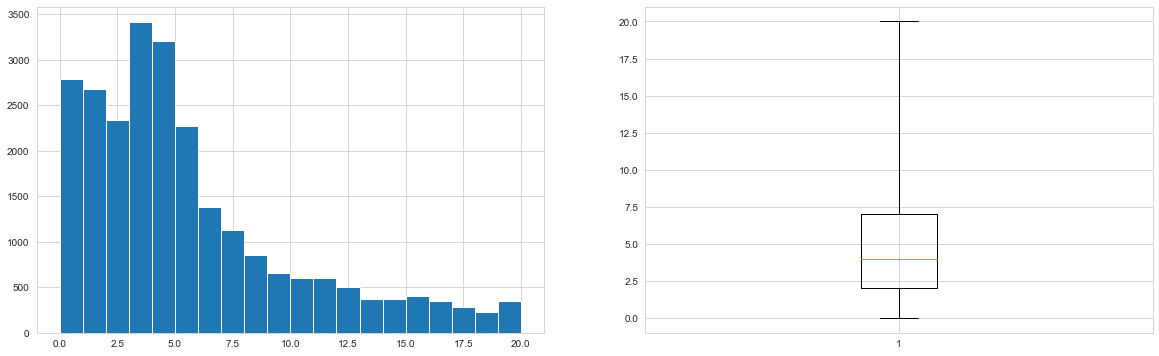

In [281]:
show_hist_box(df.age)

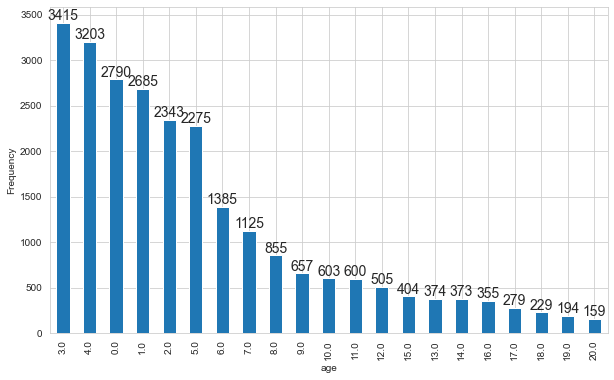

In [282]:
freq_bar(df.age)

# power_hp

<h2>The Average Horsepower Range for Cars</h2>

<p>The average horsepower range for cars can vary widely depending on several factors, such as the make and model of the car, its engine size and type, and its intended use (i.e. economy, performance, etc.).</p>

<p>In general, horsepower (hp) is a measure of the power output of the engine, and it refers to the rate at which work is done. The average horsepower range for cars can vary from less than 100 hp to more than 500 hp. However, most modern cars have an average horsepower range of 100-300 hp.</p>

<p>Some common ranges of average horsepower for cars are:</p>

<ul>
  <li>Economy cars and subcompact cars: 70-120 hp</li>
  <li>Mid-size cars and family sedans: 120-200 hp</li>
  <li>Large cars and luxury sedans: 200-300 hp</li>
  <li>Sports cars and high-performance vehicles: 300-500 hp or more</li>
</ul>

<p>It's important to note that the horsepower of a car is influenced by a variety of factors, including the engine size, the type of fuel it uses, and the design of the engine (i.e. turbocharged, supercharged, etc.). In addition, some cars may have multiple engines available with different horsepower ratings, so it's important to consider the specific model and engine when discussing horsepower.</p>

In [283]:
first_looking('power_hp')

COLUMN NAME    :  power_hp
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  316
--------------------------------
power_hp
150.00    1771
131.00    1300
110.00    1097
90.00     1047
120.00    1034
          ... 
670.00       1
451.00       1
506.00       1
678.00       1
18.00        1
Name: count, Length: 316, dtype: int64


In [284]:
df.power_hp.describe()

count   24808.00
mean      160.76
std        93.26
min         1.00
25%       105.00
50%       132.00
75%       181.00
max       904.00
Name: power_hp, dtype: float64

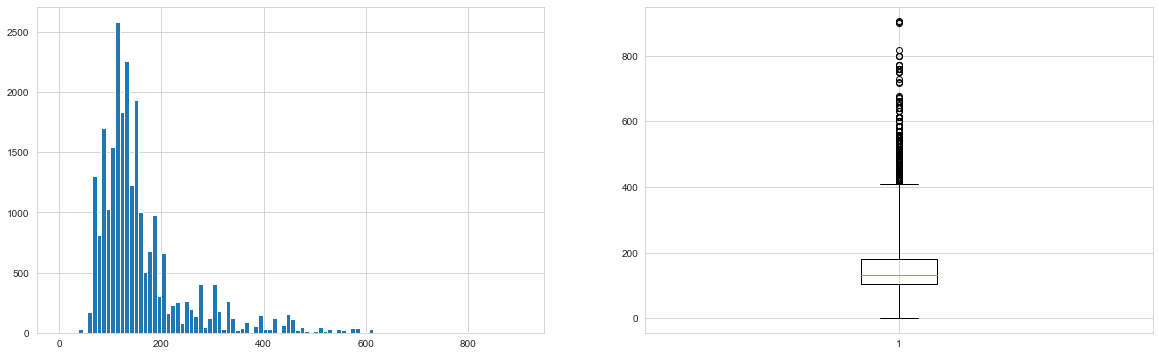

In [285]:
show_hist_box(df.power_hp,bins=100)

In [286]:
head(df.power_hp)

5235     1.00
21479    4.00
5959     5.00
5734     5.00
5997     5.00
5584     5.00
5547     5.00
23768    8.00
5349    10.00
5750    11.00
5614    11.00
5717    11.00
4953    12.00
4652    16.00
5634    16.00
4700    18.00
15933   24.00
15987   24.00
15922   26.00
9987    33.00
Name: power_hp, dtype: float64

In [287]:
tail(df.power_hp)

21034   751.00
21179   760.00
21186   760.00
21203   760.00
21165   760.00
21166   760.00
21176   760.00
21206   760.00
21298   760.00
21162   760.00
20927   771.00
20955   771.00
21048   771.00
18925   799.00
1046    799.00
1413    799.00
18973   816.00
21157   900.00
19021   903.00
18915   904.00
Name: power_hp, dtype: float64

In [288]:
# domain knowledge hyundai i10 minumum 66hp
# opel agila min 65
#opel corsa min 58hp

df[df.power_hp<58][['make_model','power_hp']]

,make_model,power_hp
4652,Renault Twizy,16.00
4700,Renault Twizy,18.00
4933,Renault ZOE,56.00
4953,Renault Twizy,12.00
4955,Renault Twingo,42.00
...,...,...
15987,Dacia Spring,24.00
16192,Toyota Aygo,54.00
21479,Ford Kuga,4.00
23768,Hyundai i20,8.00


In [289]:
df.loc[df.power_hp<58,'power_hp'] = np.nan

In [290]:
df.power_hp.isna().sum()

63

In [291]:
# nissan gt-r max 600hp
# Mercedes-Benz E 63 AMG max 603
# Mercedes-Benz AMG GT 577
# ford mustang 662
df[df.power_hp>612][['make_model','power_hp']].sort_values(by='power_hp')

,make_model,power_hp
1062,Mercedes-Benz S 65 AMG,630.00
1527,Mercedes-Benz G 65 AMG,630.00
90,Mercedes-Benz AMG GT,639.00
853,Mercedes-Benz AMG GT,639.00
875,Mercedes-Benz AMG GT,639.00
885,Mercedes-Benz AMG GT,639.00
935,Mercedes-Benz AMG GT,639.00
125,Mercedes-Benz AMG GT,640.00
18945,Nissan GT-R,650.00
1589,Mercedes-Benz EQS,658.00


In [292]:
df.loc[df.power_hp>662,'power_hp'] = np.nan

In [293]:
df.power_hp.isna().sum()

91

In [294]:
df_po = fill_with_mode('power_hp',groups=['fuel','make_model','body_type','age','country'])

power_hp
False    24717
True        91
Name: count, dtype: int64
['fuel', 'make_model', 'body_type', 'age', 'country']
power_hp
False    24744
True        64
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model', 'body_type', 'age']
power_hp
False    24751
True        57
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model', 'body_type']
power_hp
False    24761
True        47
Name: count, dtype: int64
----------------------------------------
['fuel', 'make_model']
power_hp
False    24769
True        39
Name: count, dtype: int64
----------------------------------------
['fuel']
power_hp
False    24808
Name: count, dtype: int64
----------------------------------------


In [295]:
df = df_po.copy()
del df_po

In [296]:
df = remove_duplicates()

(24808, 33)
(24807, 33)


In [297]:
# %pprint
# car_hp_counts = df['power_hp'].value_counts()
# car_hp_counts[car_hp_counts < 10]
# less_freq_hp = car_hp_counts[car_hp_counts < 10].index.to_list()
# less_freq_hp
# df["power_hp"].replace(less_freq_hp, np.nan, inplace=True)

# power_kw

In [298]:
drop_col('power_kw')

(24807, 33)
(24807, 32)


# cylinders

Most cars contain either 4, 6 or 8 cylinders, although other configurations such as 3, 5 and 10 cylinders also exist. Some luxury automakers produce engines with even more characteristics that vary in size, power and efficiency¹².

Source: Conversation with Bing, 18/03/2023(1) How Many Cylinders Does My Car Have? [Detailed Answers] - Cargister. https://cargister.com/how-many-cylinders-does-my-car-have/ Accessed 18/03/2023.
(2) What Are Cylinders on a Car Engine? | GetJerry.com. https://getjerry.com/car-repair/what-are-cylinders-on-a-car Accessed 18/03/2023.
(3) 8 Best 4-Cylinder Cars - Car and Driver. https://www.caranddriver.com/research/a31994657/best-4-cylinder-cars/ Accessed 18/03/2023.
(4) Everything you need to know about engine cylinders - ArnoldClark Newsroom. https://www.arnoldclark.com/newsroom/2331-everything-you-need-to-know-about-engine-cylinders Accessed 18/03/2023.
(5) How To Determine How Many Cylinders Your Car Has - Total Car Diagnostics. https://www.totalcardiagnostics.com/learn/how-to-determine-how-many-cylinders-your-car-has/ Accessed 18/03/2023.

In [325]:
first_looking('cylinders')

COLUMN NAME    :  cylinders
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  12
--------------------------------
cylinders
4.00     17049
3.00      4984
6.00      1153
8.00       761
5.00       403
0.00       176
1.00       139
2.00       116
7.00        16
12.00        8
26.00        1
16.00        1
Name: count, dtype: int64


In [330]:
df[df.cylinders == 2]

,make_model,make,model,price,body_type,age,fuel,country,type,warranty,mileage,gearbox,seller,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,fuel_consumption_avg,address,latitude,longitude,cc,ss,em
8895,Fiat Panda,Fiat,Panda,12000.00,Compact,3.00,Benzine,Spain,Used,Yes,50535.00,Manual,Dealer,875.00,6.00,112.00,4WD,2.00,"Alloy wheels, Winter tyres",1165.00,No,Cloth,1.00,inefficient,90.00,5.70,"Avenida del Aeropuerto, 03320 Elche, Alicante,...",38.29,-0.59,premium,Safety Security Standard,Entertainment Media Standard
8899,Fiat Panda,Fiat,Panda,12000.00,Compact,3.00,Benzine,Spain,Used,Yes,56260.00,Manual,Dealer,875.00,6.00,112.00,4WD,2.00,"Alloy wheels, Winter tyres",1165.00,No,Cloth,1.00,inefficient,90.00,5.70,"Calle Canal de San Jorge 17, 07199 Palma, Bale...",39.54,2.74,premium,Safety Security Standard,Entertainment Media Standard
8906,Fiat 500 Abarth,Fiat,500 Abarth,25490.00,Compact,0.00,Benzine,France,Used,Yes,355.00,Automatic,Dealer,1368.00,5.00,155.00,Rear,2.00,"Alloy wheels, Spare tyre",680.00,No,Part/Full Leather,1.00,inefficient,165.00,6.40,"102 Boulevard Malesherbes, 75017 Paris, France",48.88,2.31,premium,Safety Security Premium,Entertainment Media Standard
8917,Fiat 500,Fiat,500,5450.00,Compact,11.00,Benzine,Netherlands,Used,No,121062.00,Manual,Dealer,875.00,5.00,95.00,Front,2.00,"Alloy wheels (16"")",905.00,No,Cloth,2.00,inefficient,84.00,4.10,"De Oude Veiling 113, 1689 AD Zwaag, Netherlands",52.66,5.06,premium,Safety Security Premium,Entertainment Media Standard
8929,Fiat 500,Fiat,500,11750.00,Compact,8.00,Benzine,Netherlands,Used,Yes,38260.00,Manual,Dealer,875.00,5.00,92.00,Front,2.00,"Alloy wheels (16""), Spoiler, Sport seats",905.00,Yes,Part/Full Leather,1.00,inefficient,86.00,4.00,"Zuiderzeestraatweg 469, 8091 CM Wezep, Netherl...",52.47,5.99,standard,Safety Security Standard,Entertainment Media Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10718,Fiat New Panda,Fiat,New Panda,20900.00,Sedan,1.00,Benzine,Italy,Used,No,1.00,Manual,Dealer,875.00,6.00,131.00,4WD,2.00,"Emergency tyre repair kit, Roof rack",1155.00,No,Cloth,1.00,inefficient,84.00,5.70,"Via Nazionale per Donnas 69, 11026 Pont-Saint-...",45.60,7.79,premium,Safety Security Standard,Entertainment Media Standard
10744,Fiat Panda,Fiat,Panda,8900.00,Sedan,5.00,LPG/CNG,Italy,Used,No,99636.00,Manual,Dealer,875.00,5.00,107.00,Front,2.00,"Alloy wheels, Roof rack",1055.00,No,Cloth,1.00,inefficient,86.00,4.50,"Via Alfredo Pizzoni 14, 20151 Milan Milan, Italy",45.50,9.13,premium,Safety Security Premium,Entertainment Media Standard
10747,Fiat Panda,Fiat,Panda,20280.00,Sedan,1.00,Benzine,Italy,Used,Yes,9449.00,Manual,Dealer,1242.00,6.00,113.50,4WD,2.00,"Roof rack, Touch screen, Voice Control",935.00,No,Part/Full Leather,1.00,inefficient,86.00,4.90,"Via Appia Nuova, 00043 Ciampino Rome, Italy",41.78,12.60,premium,Safety Security Premium Plus,Entertainment Media Standard
10749,Fiat 500,Fiat,500,11370.00,Sedan,6.00,Benzine,Germany,Used,Yes,43356.00,Manual,Dealer,875.00,6.00,99.00,Front,2.00,"Alloy wheels (15""), E10-enabled, Emergency tyr...",1015.00,Yes,Cloth,2.00,efficient,105.00,4.20,"Steinbeisweg 40, 74523 Schwäbisch Hall, Germany",49.11,9.70,premium,Safety Security Premium,Entertainment Media Standard


In [332]:
df.loc[df.fuel == 'Electric','cylinders'] = 0

In [345]:
# df.drop(df.loc[df.cylinders.isin([1,16,26])].index, inplace = True)

In [339]:
df.loc[df.cylinders.isin([1,16,26]), 'cylinders'] = np.nan

In [358]:
df_c = fill_with_mode('cylinders',groups=['make','make_model','body_type','power_hp'])

cylinders
False    24804
True         3
Name: count, dtype: int64
['make', 'make_model', 'body_type', 'power_hp']
cylinders
False    24806
True         1
Name: count, dtype: int64
----------------------------------------
['make', 'make_model', 'body_type']
cylinders
False    24806
True         1
Name: count, dtype: int64
----------------------------------------
['make', 'make_model']
cylinders
False    24806
True         1
Name: count, dtype: int64
----------------------------------------
['make']
cylinders
False    24807
Name: count, dtype: int64
----------------------------------------


In [359]:
df_c.loc[df_c.compare(df).index]

,make_model,make,model,price,body_type,age,fuel,country,type,warranty,mileage,gearbox,seller,engine_size,gears,co2_emissions,drivetrain,cylinders,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,power_hp,fuel_consumption_avg,address,latitude,longitude,cc,ss,em
5296,Renault Megane,Renault,Megane,23900.00,Coupe,9.00,Benzine,France,Used,No,2800.00,Manual,Dealer,1998.00,6.00,176.00,Front,4.00,"Alloy wheels, Sport seats",1320.00,No,Cloth,2.00,efficient,179.00,7.50,"Catalan, 31220 Lavelanet-de-Comminges, France",43.27,1.12,premium,Safety Security Standard,Entertainment Media Standard
22787,Hyundai IONIQ 5,Hyundai,IONIQ 5,59974.00,Sedan,1.00,Benzine,Germany,Used,Yes,15600.00,Automatic,Dealer,998.00,1.00,0.00,4WD,0.00,"Alloy wheels, Ambient lighting, Automatically ...",2065.00,No,Part/Full Leather,1.00,efficient,306.00,2.36,"Dachauer Straße 467, 80993 Munich, Germany",48.18,11.51,premium_plus,Safety Security Premium,Entertainment Media Premium
22932,Hyundai Matrix,Hyundai,Matrix,1250.00,Sedan,18.00,Benzine,Germany,Used,No,175214.00,Manual,Dealer,1599.00,5.00,126.00,Front,4.00,"Ski bag, Spare tyre, Trailer hitch, Winter tyres",1429.00,No,Cloth,1.00,efficient,105.00,5.00,"Linnicher Straße 88, 52477 Alsdorf, Germany",50.89,6.17,standard,Safety Security Standard,Entertainment Media Standard


In [360]:
df = df_c.copy()
del df_c

In [362]:
first_looking('cylinders')

COLUMN NAME    :  cylinders
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
--------------------------------
cylinders
4.00     15877
3.00      4709
0.00      1804
6.00      1126
8.00       757
5.00       397
2.00       114
7.00        15
12.00        8
Name: count, dtype: int64


# Final Step (Checking final situation of data via graphs)

In [363]:
numeric_col = df.select_dtypes(include="number")
numeric_col.drop(columns=['latitude','longitude'],inplace=True)
display(numeric_col.columns)
numeric_col

Index(['price', 'age', 'mileage', 'engine_size', 'gears', 'co2_emissions',
       'cylinders', 'empty_weight', 'previous_owner', 'power_hp',
       'fuel_consumption_avg'],
      dtype='object')

,price,age,mileage,engine_size,gears,co2_emissions,cylinders,empty_weight,previous_owner,power_hp,fuel_consumption_avg
0,16950.00,6.00,120200.00,1461.00,5.00,126.00,4.00,1295.00,2.00,90.00,5.45
1,80900.00,0.00,5000.00,1.00,1.00,0.00,0.00,2355.00,1.00,292.00,2.36
2,69900.00,2.00,18900.00,1991.00,8.00,162.00,4.00,1555.00,2.00,421.00,8.40
3,46990.00,2.00,18995.00,1991.00,7.00,169.00,4.00,1455.00,2.00,306.00,7.30
4,16800.00,7.00,197000.00,2143.00,7.00,162.00,4.00,1545.00,2.00,136.00,4.90
...,...,...,...,...,...,...,...,...,...,...,...
24802,37600.00,3.00,40345.00,1969.00,8.00,0.00,0.00,2077.00,2.00,392.00,2.00
24803,5499.00,18.00,145000.00,2435.00,5.00,217.00,5.00,1357.00,3.00,170.00,9.10
24804,7300.00,11.00,96000.00,1560.00,6.00,99.00,4.00,1356.00,1.00,114.00,3.80
24805,29900.00,5.00,94343.00,1969.00,8.00,149.00,4.00,1617.00,1.00,254.00,6.50


<AxesSubplot:>

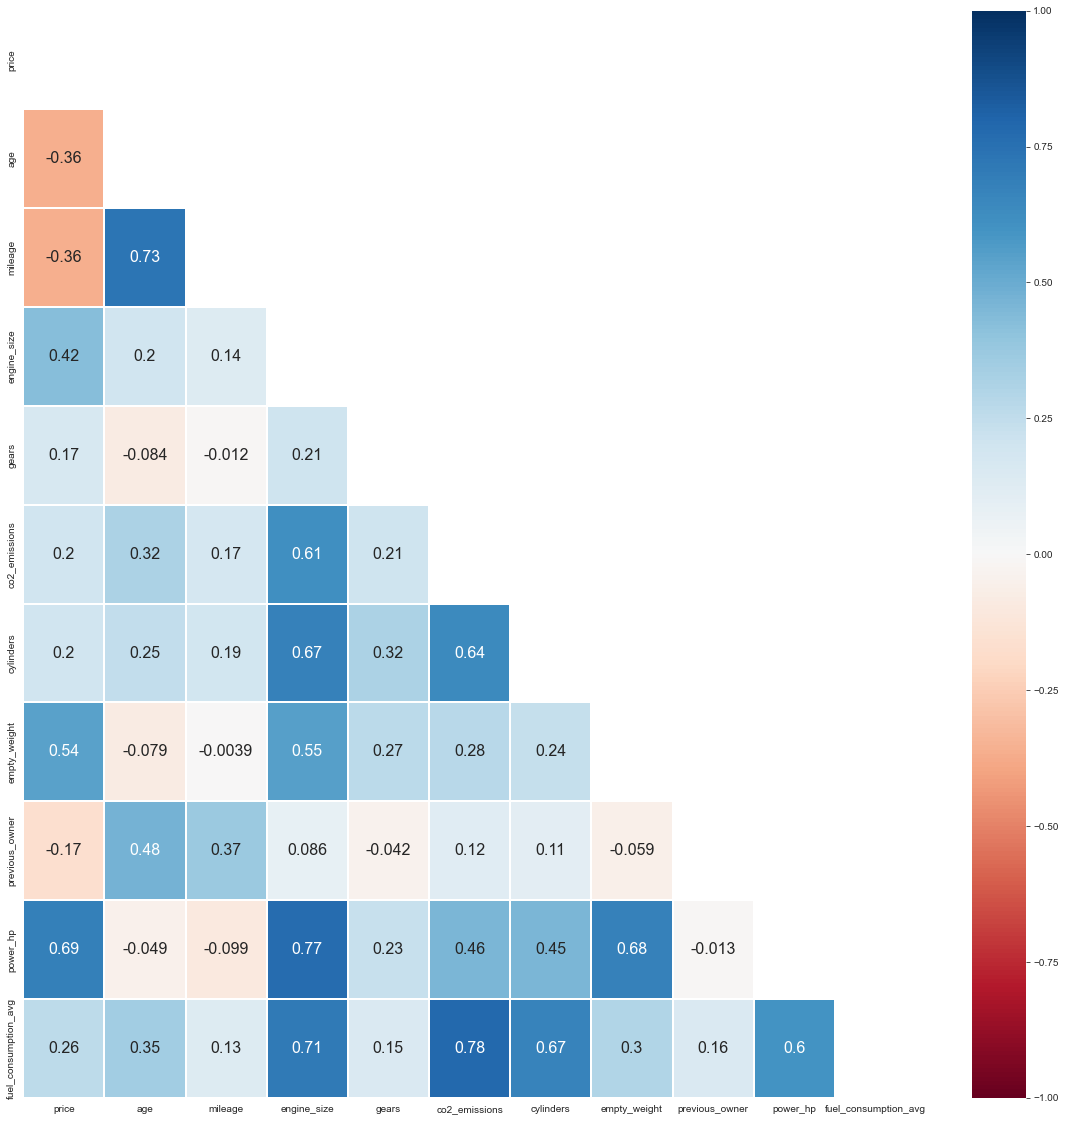

In [364]:
plt.figure(figsize=(20,20))
mask = np.triu(numeric_col.corr())
sns.heatmap(numeric_col.corr(), annot=True, mask=mask, vmin=-1, vmax=1,cmap='RdBu',linewidths=0.2, annot_kws={"size": 16})

In [365]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color

numeric_col.corr().style.applymap(color_correlation)

,price,age,mileage,engine_size,gears,co2_emissions,cylinders,empty_weight,previous_owner,power_hp,fuel_consumption_avg
price,1.000000,-0.363915,-0.362022,0.423960,0.169564,0.196168,0.198691,0.544908,-0.168586,0.685516,0.263877
age,-0.363915,1.000000,0.730979,0.198502,-0.083633,0.316807,0.246033,-0.079149,0.475159,-0.049343,0.347834
mileage,-0.362022,0.730979,1.000000,0.135408,-0.012183,0.173507,0.188141,-0.003919,0.367545,-0.099281,0.133121
engine_size,0.423960,0.198502,0.135408,1.000000,0.207159,0.612474,0.674446,0.554327,0.085852,0.771395,0.708095
gears,0.169564,-0.083633,-0.012183,0.207159,1.000000,0.210275,0.320225,0.269998,-0.042199,0.228615,0.154700
co2_emissions,0.196168,0.316807,0.173507,0.612474,0.210275,1.000000,0.637645,0.277894,0.123802,0.459822,0.782408
cylinders,0.198691,0.246033,0.188141,0.674446,0.320225,0.637645,1.000000,0.241019,0.108757,0.453126,0.667318
empty_weight,0.544908,-0.079149,-0.003919,0.554327,0.269998,0.277894,0.241019,1.000000,-0.059108,0.676533,0.299215
previous_owner,-0.168586,0.475159,0.367545,0.085852,-0.042199,0.123802,0.108757,-0.059108,1.000000,-0.013344,0.155622
power_hp,0.685516,-0.049343,-0.099281,0.771395,0.228615,0.459822,0.453126,0.676533,-0.013344,1.000000,0.595348


In [366]:
# %pip install --upgrade jinja2

In [367]:
# %pip install --upgrade cookiecutter

In [368]:
# %pip install pandas==2.0.0rc1

# multi-collinearity

In [369]:
from termcolor import cprint

def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .6 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"Multicolinearity alert in between --> {col} - {i} --> {round(df_temp[col][i], 6)}", "red", attrs=["bold"])
    else:
#         cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])
        pass

In [370]:
multicolinearity_control(numeric_col)

Multicolinearity alert in between --> price - power_hp --> 0.685516
Multicolinearity alert in between --> age - mileage --> 0.730979
Multicolinearity alert in between --> mileage - age --> 0.730979
Multicolinearity alert in between --> engine_size - co2_emissions --> 0.612474
Multicolinearity alert in between --> engine_size - cylinders --> 0.674446
Multicolinearity alert in between --> engine_size - power_hp --> 0.771395
Multicolinearity alert in between --> engine_size - fuel_consumption_avg --> 0.708095
Multicolinearity alert in between --> co2_emissions - engine_size --> 0.612474
Multicolinearity alert in between --> co2_emissions - cylinders --> 0.637645
Multicolinearity alert in between --> co2_emissions - fuel_consumption_avg --> 0.782408
Multicolinearity alert in between --> cylinders - engine_size --> 0.674446
Multicolinearity alert in between --> cylinders - co2_emissions --> 0.637645
Multicolinearity alert in between --> cylinders - fuel_consumption_avg --> 0.667318
Multicol

In [371]:
target = 'price'

corr_by_target = numeric_col.corr()[target].sort_values()
corr_by_target

age                    -0.36
mileage                -0.36
previous_owner         -0.17
gears                   0.17
co2_emissions           0.20
cylinders               0.20
fuel_consumption_avg    0.26
engine_size             0.42
empty_weight            0.54
power_hp                0.69
price                   1.00
Name: price, dtype: float64

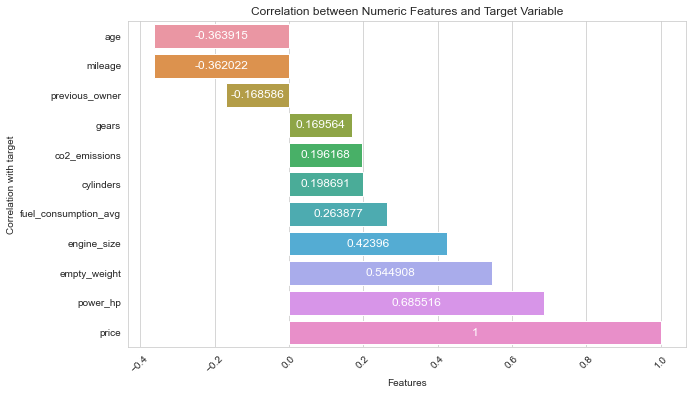

In [372]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=corr_by_target.index, x=corr_by_target.values)

# Set the labels and title
plt.xlabel('Features')
plt.ylabel('Correlation with target')
plt.title('Correlation between Numeric Features and Target Variable')
# plt.bar_label(ax.containers[0], labels=[f'{val:.2f}' for val in corr_by_target.values], fontsize=10)
for container in ax.containers:
    ax.bar_label(container, fontsize=12, rotation=0, label_type='center', color="white")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45);

In [373]:
df.duplicated(keep=False).sum()

0

## Export dataframe to csv file (without dummy)

In [376]:
df.to_csv("outliers_handled.csv", index=False)